1. Importings Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import uniform, randint
from sklearn.metrics import make_scorer
import xgboost as xgb

2. Importing Kagglehub Library

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("natezhang123/social-anxiety-dataset")

print("Path to dataset files:", path)

100%|██████████| 403k/403k [00:00<00:00, 1.04MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/natezhang123/social-anxiety-dataset/versions/2


3. Loading Data

In [ ]:
data = pd.read_csv("/kaggle/input/social-anxiety-dataset/enhanced_anxiety_dataset.csv")

4. To show the quick preview of the Data

In [ ]:
data.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


5. Att kontrollera saknade värden

In [ ]:
data.isnull().sum()

,0
Age,0
Gender,0
Occupation,0
Sleep Hours,0
Physical Activity (hrs/week),0
Caffeine Intake (mg/day),0
Alcohol Consumption (drinks/week),0
Smoking,0
Family History of Anxiety,0
Stress Level (1-10),0


6. Att välja kolumn - Yrke

In [ ]:
data["Occupation"].unique()

array(['Artist', 'Nurse', 'Other', 'Scientist', 'Lawyer', 'Teacher',
       'Doctor', 'Musician', 'Student', 'Engineer', 'Freelancer', 'Chef',
       'Athlete'], dtype=object)

7. Att visualisera Ålder (Age) & Frekvensen för varje Ålder (Count)

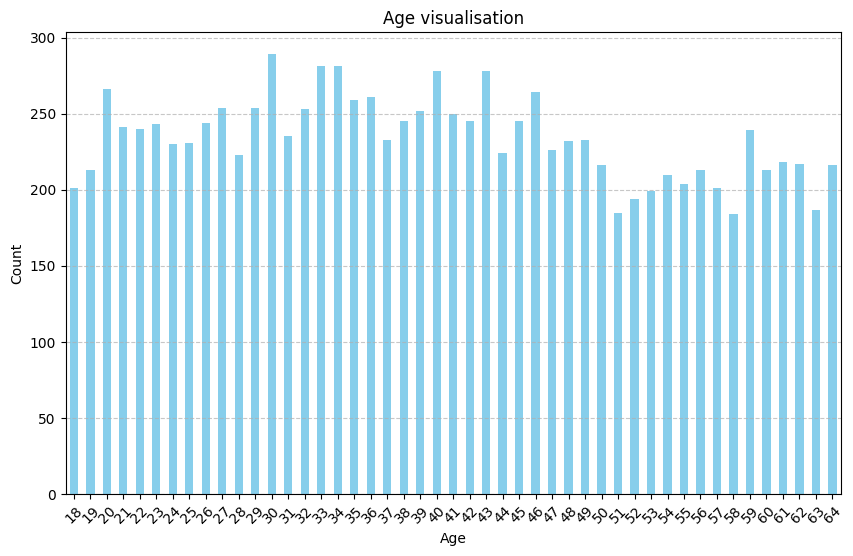

In [ ]:
age_counts = data['Age'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='skyblue')
plt.title('Age visualisation')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

8. Att visualisera ångest nivå mellan individer från Data

<ipython-input-10-fe78b70ab6d2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["Anxiety Level (1-10)"], palette="Set1")


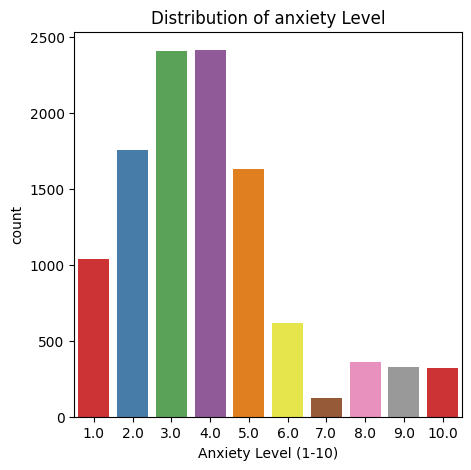

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=data["Anxiety Level (1-10)"], palette="Set1")
plt.title("Distribution of anxiety Level")
plt.show()

9. Att visualisera ångest enligt könen

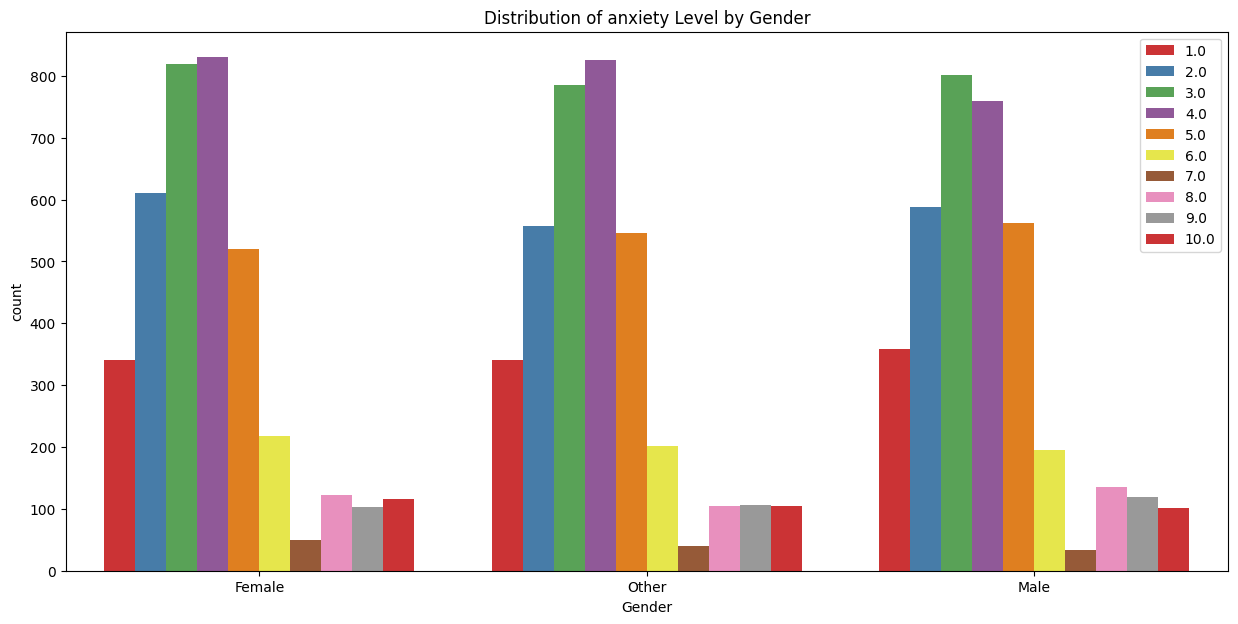

In [ ]:
plt.figure(figsize=(15, 7))
sns.countplot(data=data, x='Gender', hue='Anxiety Level (1-10)', palette='Set1')
plt.title("Distribution of anxiety Level by Gender")
plt.legend()
plt.show()

10 . Att förklara resultatet för könen

In [ ]:
data.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


11. Att ta bort (Dropping) kolumner från DataFrame

In [ ]:
objects = ['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety', 'Dizziness', 'Recent Major Life Event', 'Medication']
df = data.drop(objects, axis=1)

df.head()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
0,29,6.0,2.7,181,10,10,114,14,4,3,7,5.0
1,46,6.2,5.7,200,8,1,62,23,2,2,8,3.0
2,64,5.0,3.7,117,4,1,91,28,3,1,1,1.0
3,20,5.8,2.8,360,6,4,86,17,3,0,1,2.0
4,49,8.2,2.3,247,4,1,98,19,4,1,3,1.0


12. Att visa korrelation ( Sambandet ) mellan olika egenskaper ( 1:Betyder stark positiv lnjär samaband medan -1 Betyder Stark negativ linjär samband & 0 Betyder ingen korrelation)

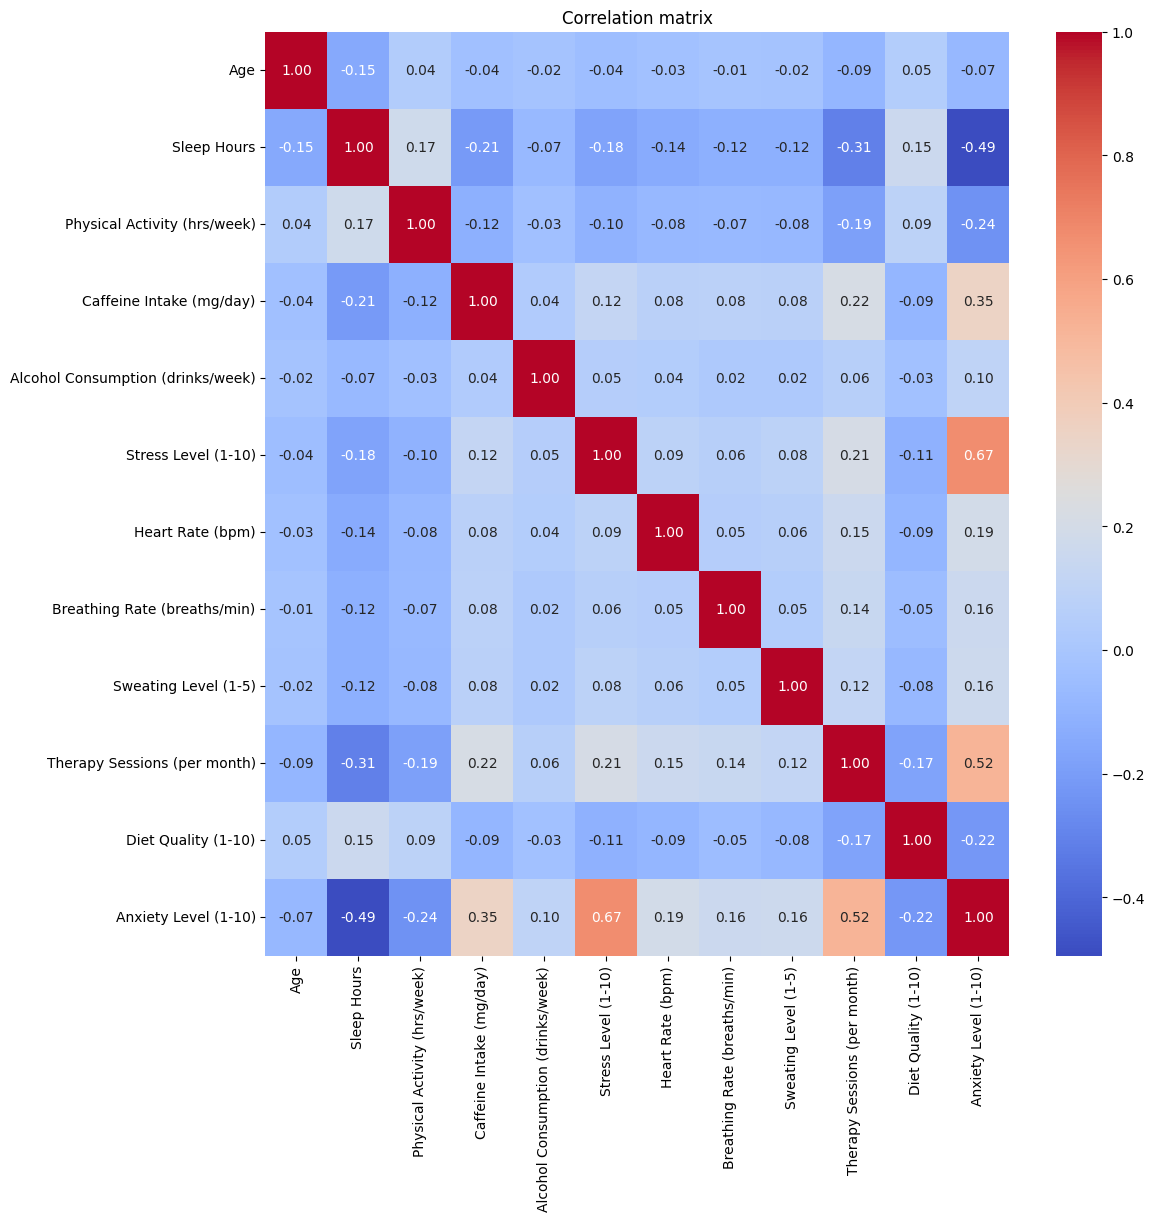

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix")
plt.show()

13. Att skapa dummyvariabler ( En typ av binära system 1 & 0 eller True & False)

In [ ]:
data_dum = pd.get_dummies(data, columns = ['Gender', 'Occupation'])

data_dum

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),...,Occupation_Doctor,Occupation_Engineer,Occupation_Freelancer,Occupation_Lawyer,Occupation_Musician,Occupation_Nurse,Occupation_Other,Occupation_Scientist,Occupation_Student,Occupation_Teacher
0,29,6.0,2.7,181,10,Yes,No,10,114,14,...,False,False,False,False,False,False,False,False,False,False
1,46,6.2,5.7,200,8,Yes,Yes,1,62,23,...,False,False,False,False,False,True,False,False,False,False
2,64,5.0,3.7,117,4,No,Yes,1,91,28,...,False,False,False,False,False,False,True,False,False,False
3,20,5.8,2.8,360,6,Yes,No,4,86,17,...,False,False,False,False,False,False,False,True,False,False
4,49,8.2,2.3,247,4,Yes,No,1,98,19,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,6.1,3.1,566,9,Yes,No,8,91,28,...,False,True,False,False,False,False,False,False,False,False
10996,50,6.6,3.6,64,17,Yes,No,7,95,17,...,False,False,False,False,False,False,False,False,False,True
10997,29,6.7,6.9,159,14,No,No,8,72,16,...,False,False,False,False,False,True,False,False,False,False
10998,53,5.7,2.7,248,8,No,No,4,112,28,...,False,False,False,False,False,False,False,False,False,False


14. Att kunna bli säkra att all integer är sparade

In [ ]:
for column in data_dum.columns:
    if column == 'Anxiety Level (1-10)':
        data_dum[column] = data_dum[column].astype(int)

data_dum

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),...,Occupation_Doctor,Occupation_Engineer,Occupation_Freelancer,Occupation_Lawyer,Occupation_Musician,Occupation_Nurse,Occupation_Other,Occupation_Scientist,Occupation_Student,Occupation_Teacher
0,29,6.0,2.7,181,10,Yes,No,10,114,14,...,False,False,False,False,False,False,False,False,False,False
1,46,6.2,5.7,200,8,Yes,Yes,1,62,23,...,False,False,False,False,False,True,False,False,False,False
2,64,5.0,3.7,117,4,No,Yes,1,91,28,...,False,False,False,False,False,False,True,False,False,False
3,20,5.8,2.8,360,6,Yes,No,4,86,17,...,False,False,False,False,False,False,False,True,False,False
4,49,8.2,2.3,247,4,Yes,No,1,98,19,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,6.1,3.1,566,9,Yes,No,8,91,28,...,False,True,False,False,False,False,False,False,False,False
10996,50,6.6,3.6,64,17,Yes,No,7,95,17,...,False,False,False,False,False,False,False,False,False,True
10997,29,6.7,6.9,159,14,No,No,8,72,16,...,False,False,False,False,False,True,False,False,False,False
10998,53,5.7,2.7,248,8,No,No,4,112,28,...,False,False,False,False,False,False,False,False,False,False


15. Att minska ångestnivån med en enhet för att kunna passa modellen

In [ ]:
for column in data_dum.columns:
    if column == 'Anxiety Level (1-10)':
        data_dum[column] = data_dum[column]-1

data_dum

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),...,Occupation_Doctor,Occupation_Engineer,Occupation_Freelancer,Occupation_Lawyer,Occupation_Musician,Occupation_Nurse,Occupation_Other,Occupation_Scientist,Occupation_Student,Occupation_Teacher
0,29,6.0,2.7,181,10,Yes,No,10,114,14,...,False,False,False,False,False,False,False,False,False,False
1,46,6.2,5.7,200,8,Yes,Yes,1,62,23,...,False,False,False,False,False,True,False,False,False,False
2,64,5.0,3.7,117,4,No,Yes,1,91,28,...,False,False,False,False,False,False,True,False,False,False
3,20,5.8,2.8,360,6,Yes,No,4,86,17,...,False,False,False,False,False,False,False,True,False,False
4,49,8.2,2.3,247,4,Yes,No,1,98,19,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,6.1,3.1,566,9,Yes,No,8,91,28,...,False,True,False,False,False,False,False,False,False,False
10996,50,6.6,3.6,64,17,Yes,No,7,95,17,...,False,False,False,False,False,False,False,False,False,True
10997,29,6.7,6.9,159,14,No,No,8,72,16,...,False,False,False,False,False,True,False,False,False,False
10998,53,5.7,2.7,248,8,No,No,4,112,28,...,False,False,False,False,False,False,False,False,False,False


16. Att alla kategoriska funktioner i datamängden omvandlas till ett numeriskt format

In [ ]:
label_encoder = LabelEncoder()

for column in data_dum.columns:
    if data_dum[column].dtype == 'object':
        data_dum[column] = label_encoder.fit_transform(data_dum[column])

data_dum

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),...,Occupation_Doctor,Occupation_Engineer,Occupation_Freelancer,Occupation_Lawyer,Occupation_Musician,Occupation_Nurse,Occupation_Other,Occupation_Scientist,Occupation_Student,Occupation_Teacher
0,29,6.0,2.7,181,10,1,0,10,114,14,...,False,False,False,False,False,False,False,False,False,False
1,46,6.2,5.7,200,8,1,1,1,62,23,...,False,False,False,False,False,True,False,False,False,False
2,64,5.0,3.7,117,4,0,1,1,91,28,...,False,False,False,False,False,False,True,False,False,False
3,20,5.8,2.8,360,6,1,0,4,86,17,...,False,False,False,False,False,False,False,True,False,False
4,49,8.2,2.3,247,4,1,0,1,98,19,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,6.1,3.1,566,9,1,0,8,91,28,...,False,True,False,False,False,False,False,False,False,False
10996,50,6.6,3.6,64,17,1,0,7,95,17,...,False,False,False,False,False,False,False,False,False,True
10997,29,6.7,6.9,159,14,0,0,8,72,16,...,False,False,False,False,False,True,False,False,False,False
10998,53,5.7,2.7,248,8,0,0,4,112,28,...,False,False,False,False,False,False,False,False,False,False


17. Att Konvertera booleska kolumner till heltal

In [ ]:
for column in data_dum.columns:
    if data_dum[column].dtype == 'bool':
        data_dum[column] = data_dum[column].astype(int)

data_dum

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),...,Occupation_Doctor,Occupation_Engineer,Occupation_Freelancer,Occupation_Lawyer,Occupation_Musician,Occupation_Nurse,Occupation_Other,Occupation_Scientist,Occupation_Student,Occupation_Teacher
0,29,6.0,2.7,181,10,1,0,10,114,14,...,0,0,0,0,0,0,0,0,0,0
1,46,6.2,5.7,200,8,1,1,1,62,23,...,0,0,0,0,0,1,0,0,0,0
2,64,5.0,3.7,117,4,0,1,1,91,28,...,0,0,0,0,0,0,1,0,0,0
3,20,5.8,2.8,360,6,1,0,4,86,17,...,0,0,0,0,0,0,0,1,0,0
4,49,8.2,2.3,247,4,1,0,1,98,19,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,6.1,3.1,566,9,1,0,8,91,28,...,0,1,0,0,0,0,0,0,0,0
10996,50,6.6,3.6,64,17,1,0,7,95,17,...,0,0,0,0,0,0,0,0,0,1
10997,29,6.7,6.9,159,14,0,0,8,72,16,...,0,0,0,0,0,1,0,0,0,0
10998,53,5.7,2.7,248,8,0,0,4,112,28,...,0,0,0,0,0,0,0,0,0,0


18. Att Definiera målvariabeln och funktionerna

In [ ]:
target = "Anxiety Level (1-10)"

X = data_dum.drop(target, axis=1)
y = data_dum[target]

18. Data Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

19. Att träna Modellen

In [ ]:
model_class = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=10,
    random_state=42,
    n_jobs=-1
)

params = {
    "colsample_bytree": uniform(0.6, 0.4),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3),
    "max_depth": randint(2, 6),
    "n_estimators": randint(100, 150),
    "subsample": uniform(0.6, 0.4),
    "reg_alpha": uniform(0, 1),
    "reg_lambda": uniform(0, 1)
}
search = RandomizedSearchCV(
    model_class,
    param_distributions=params,
    n_iter=200,
    cv=3,
    scoring="accuracy",
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)

print("Best parameters:", search.best_params_)
print("Best accuracy:", search.best_score_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Best parameters: {'colsample_bytree': np.float64(0.919942102378926), 'gamma': np.float64(0.21260675223461672), 'learning_rate': np.float64(0.03674079249603522), 'max_depth': 3, 'n_estimators': 108, 'reg_alpha': np.float64(0.5416342146608669), 'reg_lambda': np.float64(0.6334782198261473), 'subsample': np.float64(0.7031550741732809)}
Best accuracy: 0.36306915957559466


20. Att Definiera de bästa parametrarna

In [ ]:
best_params = {
    'colsample_bytree': 0.919942102378926,
    'gamma': 0.21260675223461672,
    'learning_rate': 0.03674079249603522,
    'max_depth': 3,
    'n_estimators': 108,
    'reg_alpha': 0.5416342146608669,
    'reg_lambda': 0.6334782198261473,
    'subsample': 0.7031550741732809
}

final_model_class = xgb.XGBClassifier(
    objective="multi:softmax",
    **best_params,
    random_state=42,
    n_jobs=-1
)

final_model_class.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.919942102378926, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.21260675223461672,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03674079249603522,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=108, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softmax', ...)

21. Att Förutsäga och utvärdera modellen

In [ ]:
y_pred_c = final_model_class.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_c)

print("Accuracy:", accuracy)

Accuracy: 0.34136363636363637


22. Att skapa Confusion Matrix - Färgerna presenterar the number of points so darker color betyder att vi har hög nummer av data points medan lighter color betyder att vi har låg nummer av data points.

Siffrorna 0 till 200 är number of observation och det betyder att om vi har siffran 100 i en viss cell, modellen gjorde en spesifik prediktion i celln som hade 100 ex.

Siffran 0 till 9 för true tabel & prediction tabel : represent ångestnivå.

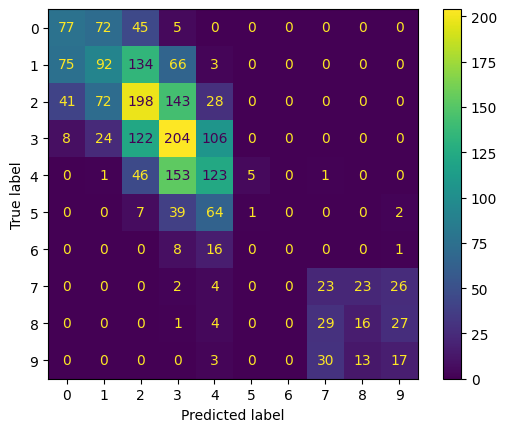

In [ ]:
cm = confusion_matrix(y_test, y_pred_c)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

23. Att använda Random för att nå minsta prediktion fel

In [ ]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
import xgboost as xgb
import numpy as np

model_reg = xgb.XGBRegressor(
    objective="reg:squaredlogerror",
    random_state=42,
    n_jobs=-1
)

params = {
     "colsample_bytree": uniform(0.6, 0.4),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3),
    "max_depth": randint(2, 6),
    "n_estimators": randint(100, 150),
    "subsample": uniform(0.6, 0.4),
    "reg_alpha": uniform(0, 1),
    "reg_lambda": uniform(0, 1)
}
search = RandomizedSearchCV(
    model_reg,
    param_distributions=params,
    n_iter=200,
    cv=3,
    scoring="neg_mean_squared_error",
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)

print("Best parameters:", search.best_params_)
print("Best MSE:", -search.best_score_)


Fitting 3 folds for each of 200 candidates, totalling 600 fits
Best parameters: {'colsample_bytree': np.float64(0.7874772639179881), 'gamma': np.float64(0.2074097511688326), 'learning_rate': np.float64(0.11202212157921186), 'max_depth': 5, 'n_estimators': 105, 'reg_alpha': np.float64(0.691714397168912), 'reg_lambda': np.float64(0.5343462750294631), 'subsample': np.float64(0.8999642997879886)}
Best MSE: 1.0931710004806519


24. Att Definiera och träna den slutliga regressionsmodellen

In [ ]:
best_params = {
    'colsample_bytree': 0.7874772639179881,
    'gamma': 0.2074097511688326,
    'learning_rate': 0.11202212157921186,
    'max_depth': 5,
    'n_estimators': 105,
    'reg_alpha': 0.691714397168912,
    'reg_lambda': 0.5343462750294631,
    'subsample': 0.8999642997879886
}

final_model_reg = xgb.XGBRegressor(
    objective="reg:squaredlogerror",
    **best_params,
    random_state=42,
    n_jobs=-1
)
final_model_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7874772639179881, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.2074097511688326,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.11202212157921186,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=105, n_jobs=-1,
             num_parallel_tree=None, objective='reg:squaredlogerror', ...)

25. Att förutsäga ångestnivåer

In [ ]:
y_pred_reg = final_model_reg.predict(X_test)
y_pred_reg

array([4.027899 , 3.7843637, 7.2620177, ..., 2.2856035, 2.4404356,
       2.5574076], dtype=float32)

26. Ångestnivå från decimal till integer

In [ ]:
y_pred_round = np.round(y_pred_reg).astype(int)
y_pred_round

array([4, 4, 7, ..., 2, 2, 3])

27. utvärdering av performance hos en regressionsmodell

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score

mse = mean_squared_error(y_test, y_pred_round)
mae = mean_absolute_error(y_test, y_pred_round)
r2 = r2_score(y_test, y_pred_round)
accuracy = accuracy_score(y_test, y_pred_round)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)
print("Accuracy:", accuracy)

MSE: 1.1154545454545455
MAE: 0.7836363636363637
R²: 0.7592723486382755
Accuracy: 0.3668181818181818


28. Confusion Matrix ( Hur mycket modellens prediktion är bra)

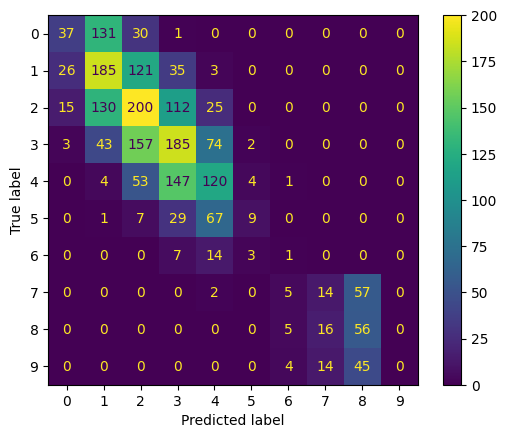

In [ ]:
cm = confusion_matrix(y_test, y_pred_round)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

29. Att kunna jämföra mellan Modellens prediktion & verkliga ångestnivåer

In [ ]:
data_pred={
    'y_pred': y_pred_reg,
    'y_true': y_test,
    'y_fin': y_pred_round
}

df_check = pd.DataFrame(data_pred)
df_check.head(20)

,y_pred,y_true,y_fin
107,4.027899,4,4
5484,3.784364,4,4
6998,7.262018,9,7
3984,0.534632,0,1
3111,1.340344,0,1
4040,0.277686,2,0
3013,3.930634,3,4
6607,2.066857,4,2
4219,2.029302,3,2
8750,2.922791,3,3


30. Att kunna förstå DataFrame som innehåller result för prediktionen

In [ ]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2200 entries, 107 to 7571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y_pred  2200 non-null   float32
 1   y_true  2200 non-null   int64  
 2   y_fin   2200 non-null   int64  
dtypes: float32(1), int64(2)
memory usage: 60.2 KB


31. Beräkning och visualisering av prediktionsfel

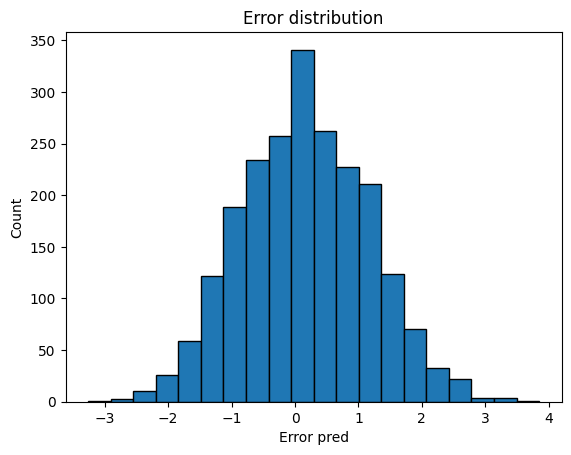

In [ ]:
errors = df_check['y_true'] - df_check['y_pred']
plt.hist(errors, bins=20, edgecolor='black')
plt.xlabel("Error pred")
plt.ylabel("Count")
plt.title("Error distribution")
plt.show()

32. Att visa alla möjliga ångestnivåer i dataset

In [ ]:
data_dum['Anxiety Level (1-10)'].unique()

array([4, 2, 0, 1, 3, 8, 6, 7, 5, 9])

33. Att Skapa en kopia och ändra ångestnivån

In [ ]:
df_copy = data_dum.copy()
df_copy['Anxiety Level (1-10)'] = df_copy['Anxiety Level (1-10)'].apply(
    lambda x: 0 if 0 <= x <= 4 else (1 if 5 <= x <= 9 else x)
)
df_copy = df_copy.rename(columns={'Anxiety Level (1-10)': 'Anxiety Level (0-1)'})
df_copy['Anxiety Level (0-1)'].unique()

array([0, 1])

34. Att Definiera målvariabeln och funktionerna

In [ ]:
target = "Anxiety Level (0-1)"

X = df_copy.drop(target, axis=1)
y = df_copy[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

35. Att definera regression modell & förbättra noggrannhet

In [ ]:
model_reg = xgb.XGBRegressor(
    objective="reg:squaredlogerror",
    random_state=42,
    n_jobs=-1
)

params = {
    "colsample_bytree": uniform(0.6, 0.4),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3),
    "max_depth": randint(2, 6),
    "n_estimators": randint(100, 150),
    "subsample": uniform(0.6, 0.4),
    "reg_alpha": uniform(0, 1),
    "reg_lambda": uniform(0, 1)
}
search = RandomizedSearchCV(
    model_reg,
    param_distributions=params,
    n_iter=200,
    cv=3,
    scoring="neg_mean_squared_error",
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)

print("Best parameters:", search.best_params_)
print("Best MSE:", -search.best_score_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Best parameters: {'colsample_bytree': np.float64(0.6636982953117058), 'gamma': np.float64(0.1018506246381371), 'learning_rate': np.float64(0.057349347121857505), 'max_depth': 5, 'n_estimators': 114, 'reg_alpha': np.float64(0.45369363460528267), 'reg_lambda': np.float64(0.5303543937282561), 'subsample': np.float64(0.6071447569913277)}
Best MSE: 0.05643844977021217


36. Att Skapa och träna den slutliga modellen

In [ ]:
best_params = {
    'colsample_bytree': 0.6636982953117058,
    'gamma': 0.1018506246381371,
    'learning_rate': 0.057349347121857505,
    'max_depth': 5,
    'n_estimators': 114,
    'reg_alpha': 0.45369363460528267,
    'reg_lambda': 0.5303543937282561,
    'subsample': 0.6071447569913277
}

final_model_reg = xgb.XGBRegressor(
    objective="reg:squaredlogerror",
    **best_params,
    random_state=42,
    n_jobs=-1
)
final_model_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6636982953117058, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.1018506246381371,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.057349347121857505,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=114, n_jobs=-1,
             num_parallel_tree=None, objective='reg:squaredlogerror', ...)

37. den här koden använder den tränade modellen för att förutsäga ångestnivåer

In [ ]:
y_pred_reg = final_model_reg.predict(X_test)
y_pred_reg

array([0.3370105 , 0.1779231 , 0.8827666 , ..., 0.00468401, 0.01781929,
       0.0273743 ], dtype=float32)

38. Att kunna få ångestnivå som en hel siffra 1 eller 2 eller ....

In [ ]:
y_pred_round = np.round(y_pred_reg).astype(int)
y_pred_round

array([0, 0, 1, ..., 0, 0, 0])

39. Att Utvärdering av regressionsmodellens prestanda

In [ ]:
mse = mean_squared_error(y_test, y_pred_round)
mae = mean_absolute_error(y_test, y_pred_round)
r2 = r2_score(y_test, y_pred_round)
accuracy = accuracy_score(y_test, y_pred_round)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)
print("Accuracy:", accuracy)

MSE: 0.06318181818181819
MAE: 0.06318181818181819
R²: 0.5341709522532843
Accuracy: 0.9368181818181818


40. Confusion Matrix ( I can see directly the good result in the diagonal with numbers 1842 and 219 and that mean the modell performance är väldigt bra.

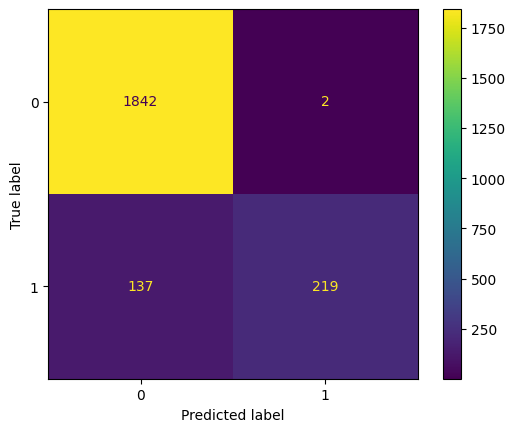

In [ ]:
cm = confusion_matrix(y_test, y_pred_round)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()